In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab10.ipynb")

<table style="width: 100%;">
    <tr style="background-color: transparent;"><td>
        <img src="https://data-88e.github.io/assets/images/blue_text.png" width="250px" style="margin-left: 0;" />
    </td><td>
        <p style="text-align: right; font-size: 10pt;"><strong>Economic Models</strong>, Fall 2024<br>
            Dr. Eric Van Dusen<br>
        Andrei Caprau<br>
        Sreeja Apparaju<br>
        Umar Maniku<br>
        Rohan Jha<br>
        Yiyang Chen<br>
        Akhil Venkatesh<br></p></td></tr>
</table>

# Lab 10: Finance

In this lab, we'll go over some of the concepts taught in lecture and explore how we can better understand these concepts.

In [2]:
try: 
    import yfinance as yf
except:
    !pip install yfinance
    import yfinance as yf

  Using cached yfinance-0.2.49-py2.py3-none-any.whl (101 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
  Using cached peewee-3.17.8-cp311-cp311-linux_x86_64.whl
  Using cached beautifulsoup4-4.12.3-py3-none-any.whl (147 kB)
  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.9.3
    Uninstalling beautifulsoup4-4.9.3:
      Successfully uninstalled beautifulsoup4-4.9.3


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import sympy
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from scipy import stats
import warnings
from datascience import *
warnings.filterwarnings('ignore')
%matplotlib inline

## Compounding Interest

We mentioned in this week's lesson how interest in one year builds on top of not only the principal amount of money deposited into an account, but also the interest earned in previous years. This can be very powerful.

Below is a tool that simulates a retirement or savings account. Each year, a fixed amount is deposited into the account. This is represented by `deposits`. In addition, the account compounds interest from last year's balance, with constant interest rate `r`. **`r` is expressed as a proportion.** So if an account yields 10% interest, `r = 0.1`. `t` is how many years this account accrues interest. In this example, if `t` is 0, the balance in the account is just the deposit as no interest has been accrued. If `t` is 1, the balance in the account is the initial deposit with interest compounded, plus the next year's deposit.

**Question 1:** Complete the code for `plot_comp_interest`. Notice that the list called `balance` tracks the current balance in the account each year. We've given you the first element in that list. For each year after the first, how do you calculate the balance in the account? 

After completing the code for `plot_comp_interest`, use this function to compute the balance you have after 5 years for a deposit of 10,000 every year at an interest rate of 5%. Assign the value to `balance_calc`.

*Hint*: Recall that the account grows through interest **AND** yearly deposits.


Balance after 5 years: 68019.13
Balance if there were no interest: 60000


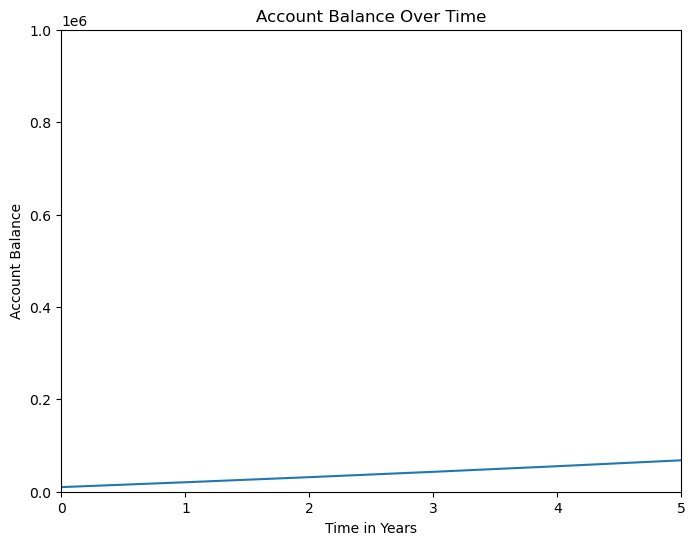

In [4]:
def plot_comp_interest(deposits, r, t):
    # This initiates a list where we will store the balance
    # in the account for each year.
    balance = np.array([])
    balance = np.append(balance, deposits)
    
    # For each year, this adds an element to the list of 
    # balances.
    for _ in range(t):
        balance = np.append(balance, balance.item(-1) * (1 + r) + deposits)
        
    # Code for plotting, don't edit
    plt.figure(figsize=(8,6))
    plt.plot(np.arange(t + 1), balance)
    plt.xlabel('Time in Years')
    plt.ylabel('Account Balance')
    plt.title('Account Balance Over Time')
    plt.ylim((0, 1000000))
    plt.xlim((0, t))
    
    print('Balance after {} years: {}'.format(t, np.round(balance.item(-1), 2)))
    print('Balance if there were no interest: {}'.format(deposits * (t + 1)))
    return balance.item(-1)
balance_calc = plot_comp_interest(10000, 0.05, 5)


In [5]:
grader.check("q1")

q1 results: All test cases passed!

Run the cell below to generate an interactive plot where you can adjust the three variables in `plot_comp_interest` to see what happens to the balance in the account.

In [6]:
deposits_slider = widgets.IntSlider(min = 500, max = 10000, step = 500, value = 5000)
r_slider = widgets.FloatSlider(min = 0.01, max = 0.2, step = 0.01, value = 0.1)
t_slider = widgets.IntSlider(min = 10, max = 30, step = 1, value = 20)
display(widgets.interactive(plot_comp_interest, deposits = deposits_slider, r = r_slider, t = t_slider))

interactive(children=(IntSlider(value=5000, description='deposits', max=10000, min=500, step=500), FloatSlider…

**Question 2**: Try out the sliders. Assign `True` to the respective variable if the answer to the question is "yes", and `False` if the answer to the question is "no".
* 2.1: What happens as you increase the amount of fixed deposits? Does the balance in the account grow faster?
* 2.2: What happens as the interest rate increases? Does the balance in the account grow faster?
* 2.3: What happens as you invest into the account for longer periods of time? Are you left with a smaller account balance than if you had invested for a shorter period of time?

In [7]:
q2_1 = True
q2_2 = True
q2_3 = False

In [8]:
grader.check("q2")

q2 results: All test cases passed!

## Graphing Stocks

For the following questions, we will finding the returns for Apple and Meta stocks. Similar to our lecture notebook, we will first be plotting the time series graph for Apple and Meta's stock prices. Then, we will be plotting their returns on the same graph like we did in lecture for the S&P500 and NASDAQ. 

Below, we define `data_APMT` that contains the stocks information for Apple and Tesla from November 1st, 2012 until Novemeber 1st, 2023 (a week before this lab was released!).

In [9]:
data_APMT = yf.download(("AAPL", 'META'), start="2012-11-01", end="2023-11-01")

[*********************100%***********************]  2 of 2 completed


In [10]:
# You don't need to understand the following code
data_AM = data_APMT.iloc[:, [2,3]]
data_AP = data_APMT.iloc[:, 0]
data_MT = data_APMT.iloc[:, 1]
dAP = np.array(len(data_AP)-1)
for i in range(len(data_AP)-1):
    dat = ((data_AP[i] - data_AP[i+1])/data_AP[i])*100
    dAP = np.append(dAP,dat)
dMT = np.array(len(data_MT)-1)
for i in range(len(data_MT)-1):
    dat = ((data_MT[i] - data_MT[i+1])/data_MT[i])*100
    dMT = np.append(dMT,dat)
data_AM['AP Returns'] = dAP
data_AM['MT Returns'] = dMT

The above code is written in Pandas and you don't need to understand it for the purposes of this class or lab. It essentially calculates the return rate (one of the formulas we discussed in lecture). Just run the 2 cells below - they should produce graphs which you will analyze to answer questions 3.1 and 3.2. If you're not sure what the graphs represent, please make sure to look at the titles of the graphs!

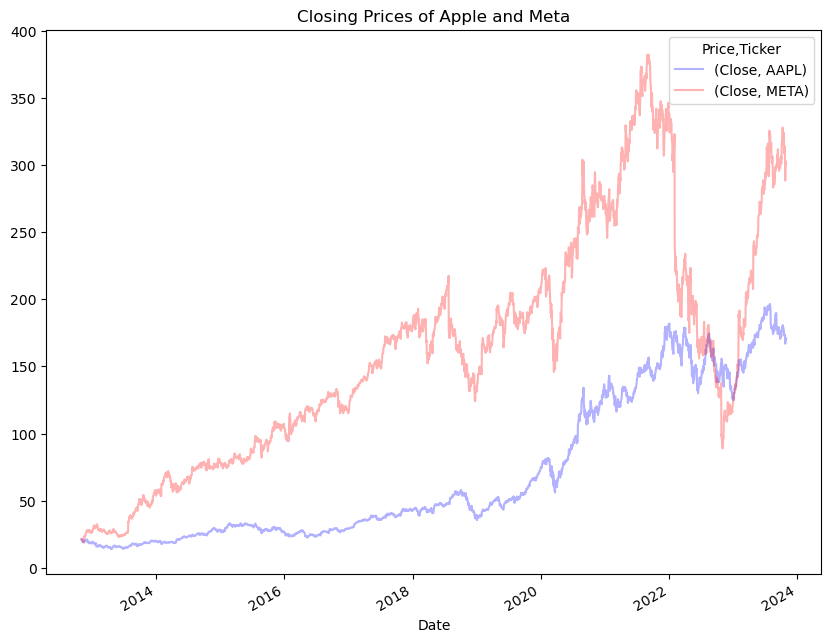

In [11]:
data_AM.iloc[:,[0,1]].plot(color = ('blue', 'red'), 
                           figsize = (10,8), alpha = 0.3, 
                           title = 'Closing Prices of Apple and Meta');

<!-- BEGIN QUESTION -->

**Question 3.1:** Comment on the closing price of Apple and Meta over the years. What do you observe? Compare the two.

Apple shows consistent growth from 2012 to 2024; there are fewer periods of downturns compared to Meta. Apple seems to show resilience during times of weakness in markets, with a quicker recovery. Meta seems to exhibits much higher volatility compared to Apple which probably makes sense since its susceptible to regulatory scrutiny, competition, and public perception shifts. Overall, it seems Apple is much more consistent in growth which would make it a more stable choice for investors. Meta has times of rapid growth but is much more prone to fluctuations. Share price for Apple is probably lower due to market capitalization and Meta is high just due to the smaller amount of shares that are issued to the public. 

<!-- END QUESTION -->



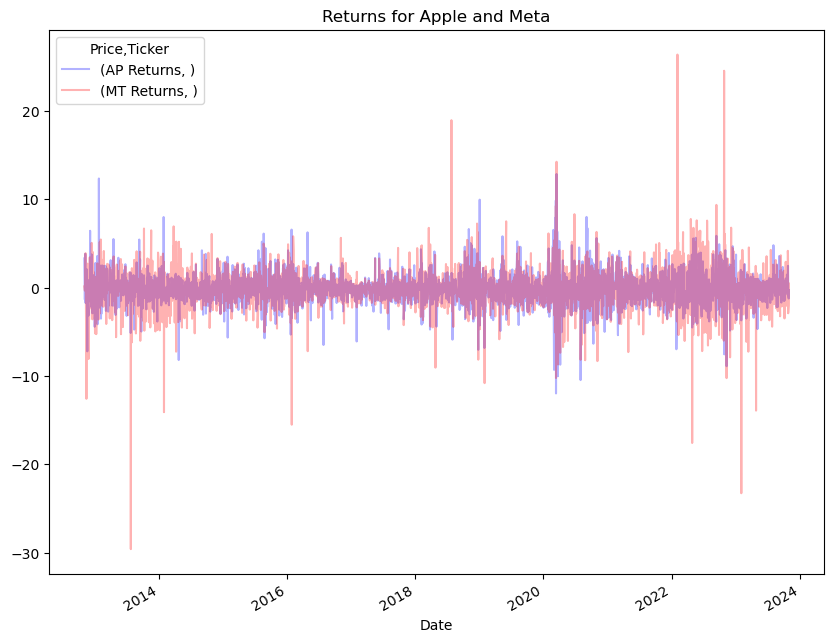

In [12]:
data_3_1 = data_AM[['AP Returns', 'MT Returns']].iloc[1:]
data_3_1.plot(color = ('blue', 'red'), figsize = (10,8), alpha = 0.3, title = "Returns for Apple and Meta");

<!-- BEGIN QUESTION -->

**Question 3.2:** Comment on the returns for Apple and Meta over the years. What do you observe? Compare the two.

Apple seems to show steady returns over the years with less outlier points. Meta seems to show extreme losses and extreme returns which just shows the volatility of the stock. Apple is much more steadier only showing significant losses during the pandemic and is a lot less volatile and it bounces within $\pm 10$ of 0. Apple's dedication to constant innovation, good hardware sales, particularly from the iPhone, and general service and ecosystem provide a stable foundation. Apple’s diversification into other forms of technology such as wearables, software, and its focus on retaining customers all contribute to its constant long term return. Meta, on the other hand, faces consistent challenges with advertising, competition from other platforms such as TikTok, and its shift towards the Metaverse which may seem like an area of uncertainty for investors unsure if their money and time will pay off. 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 3.3:** Now we will work with more stocks other than Apple and Meta. Think of a stock that would have increased rapidly during COVID, and another that would have decreased rapidly. Explain why you think their stock prices may have increased or decreased during the COVID pandemic.


A stock that would've rapidly increased during Covid would be Zoom. The lockdowns imposed by governments around the world required everyone to shift to remote work and learning environemnts. Because of this, people turned to video confrencing platforms to stay connected and just the ease of use, user interface, and scalability made it the prefered choice for users globally. A stock that would've been decreasing rapidly would be United Airlines. Severe travel restrictions including travel bans would have reduced the airlines' passenger revenue significantly. The high overhead costs like maintenance would still be there despite the reduction in flights which would be straining the business.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 3.4:** Now, define `data_covid` to include the data for the 2 stocks you discussed in questions 3.3. This time, you will be looking these stocks from the start of 2020 until the end of 2021 - a time period chosen to help you see the effects of COVID! We have already provided the basic code below - just input in the tickers for the stocks you're interested in at the right places. 


In [13]:
data_covid = yf.download(("ZM", "UAL"), start="2020-01-01", end="2021-12-31")

[*********************100%***********************]  2 of 2 completed


<!-- END QUESTION -->

The code cell below does the same pandas manipulations as above to calculate the return rate for your stocks. Feel free to just run it!

In [14]:
# You don't need to understand the following code:
data_one_covid = data_covid.iloc[:, [2,3]]
data_two = data_covid.iloc[:, 0]
data_three = data_covid.iloc[:, 1]
dtwo = np.array(len(data_two)-1)
for i in range(len(data_two)-1):
    dat = ((data_two[i] - data_two[i+1])/data_two[i])*100
    dtwo = np.append(dtwo,dat)
dthree = np.array(len(data_three)-1)
for i in range(len(data_three)-1):
    dat = ((data_three[i] - data_three[i+1])/data_three[i])*100
    dthree = np.append(dthree,dat)
col_1_38 = data_covid.columns[0][1]
col_2_38 = data_covid.columns[1][1]
data_one_covid[f'Returns for {col_1_38}'] = dtwo
data_one_covid[f'Returns for {col_2_38}'] = dthree

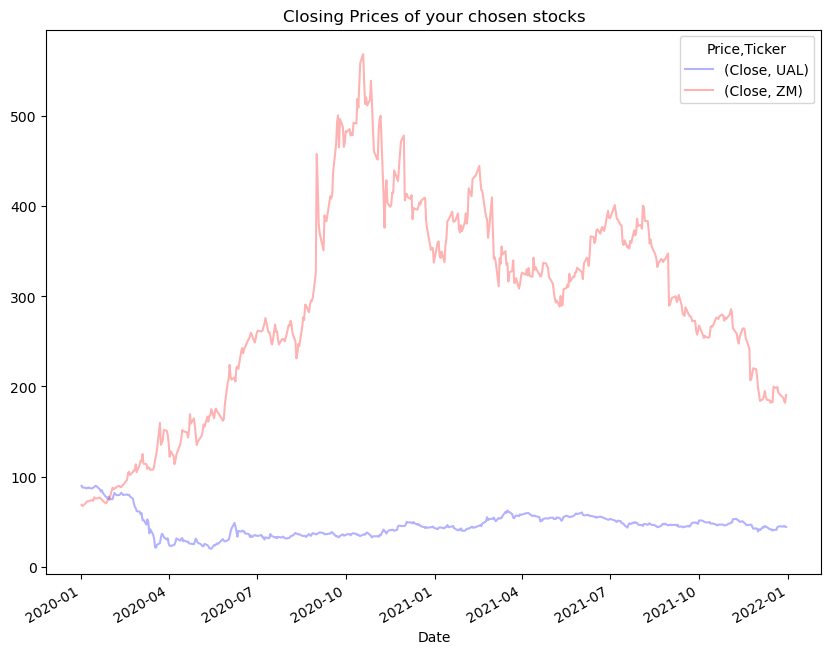

In [15]:
data_3_4_1 = data_one_covid.iloc[:,[0,1]]
data_3_4_1.plot(color = ('blue', 'red'), figsize= (10,8), alpha = 0.3, title = 'Closing Prices of your chosen stocks');

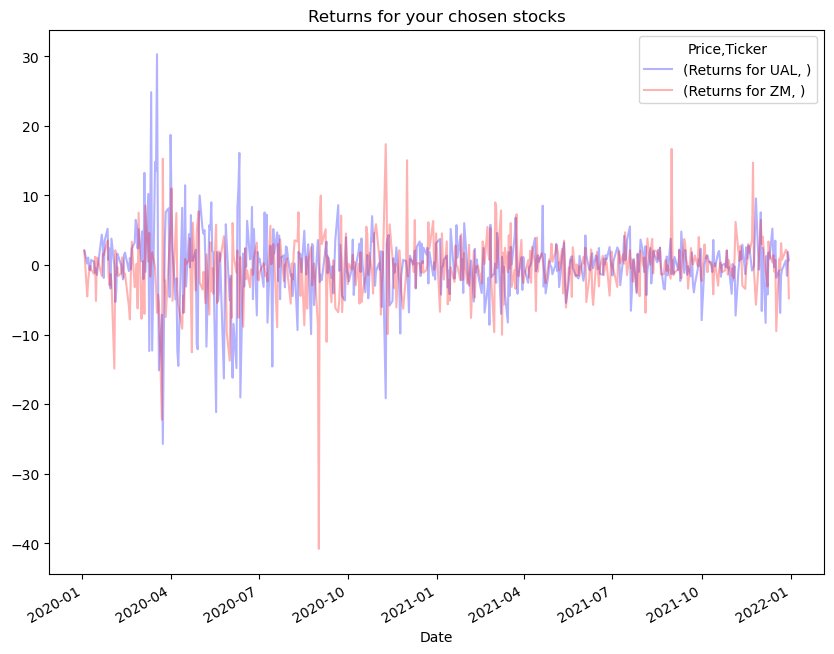

In [16]:
data_3_4_2 = data_one_covid[[f'Returns for {col_1_38}', f'Returns for {col_2_38}']].iloc[1:]
data_3_4_2.plot(color = ('blue', 'red'), figsize=(10,8), alpha =0.3, title = "Returns for your chosen stocks");

<!-- BEGIN QUESTION -->

**Question 3.5:** Comment on the prices and returns of your chosen stocks. Do these prices and returns align with your expectations? How about the volatility of these two stocks? Full credit will be awarded to any reasonable answers showcasing thought and effort.


The prices do align with my expectation as we see Zoom surge in the pandemic and United Airlines drop and plateau throughout the duration of the pandemic. As for the returns they also do somewhat align. UAL does show losses for most of the pandemic but returns start to show up again as lockdown measures are eased up. As for Zoom, I would have expected more solid returns but instead in october we have a big loss. I suspect that the -42 return for Zoom comes from the fact that it has needed to spend heavily to keep hold of market share which is just a big red flag for investors that it is not a suitable long term investment. 

<!-- END QUESTION -->

**Question 3.6:**
Which of the following has the potential to positively impact stock prices of a certain company?

<ol type="A" style="list-style-type: lower-alpha;">
    <li>The Federal Reserve has decided to raise the interest rate to combat inflation. </li>
    <li>Investors are not confident about the market. </li>
    <li>The company's earnings report shows a higher level of revenue than expected. </li>
    <li>There is bad news about the company's product.  </li>
</ol>

Assign a letter corresponding to your answer to `q3_6` below. For example, `q3_6 = 'a'`.


In [17]:
q3_6 = "c"

In [18]:
grader.check("q3_6")

q3_6 results: All test cases passed!

## Options

In the following section you will be asked a series of short questions regarding options. Set the variable for each question equal to your answer.

**Question 4.1:** Let's say that you are interested in purchasing the stock of Tesla, but owning Tesla stock makes you nervous due to the volatile nature of the stock price. Therefore, you would like to hedge your holdings by purchasing options. If you purchase 100 shares of Tesla, what kind of option would you need to use to hedge against extreme losses in the event that Tesla's price drops? 

<ol type="A" style="list-style-type: lower-alpha;">
    <li>Long call </li>
    <li>Long put </li>
    <li>Short call </li>
    <li>Short put  </li>
</ol>

Assign a letter corresponding to your answer to `q4_1` below. For example, `q4_1 = 'a'`.


In [19]:
q4_1 = "b"

In [20]:
grader.check("q4_1")

q4_1 results: All test cases passed!

**Question 4.2:** Continuing from the scenario above, let's say you purchase 100 shares of the Tesla stock for a price of \\$1000 each. Additionally, you purchased a long put for \\$100 that covers all your 100 shares with the following properties: strike of \\$800, expiration in one week. Immediately after making these purchases, assuming that they constitute the entirety of your portfolio, how much is your portfolio worth? For this group of questions we will acknowledge that options have value and not ignore their cost.


In [21]:
q4_2 = 100 * 1000 + 100

In [22]:
grader.check("q4_2")

q4_2 results: All test cases passed!

**Question 4.3:** Continuing from above, how much is your portfolio worth after one week has passed, assuming that Tesla's price remains at \\$1000 the entire time?


In [23]:
q4_3 = 100 * 1000 + 100

In [24]:
grader.check("q4_3")

q4_3 results: All test cases passed!

**Question 4.4:** Continuing from above, suppose that Tesla's price remained at \\$1000 for one week, but after that its price dropped to \\$700. Displeased with this, you decide to sell off your portfolio without exercising the options. How much did you gain/lose in this scenario, from portfolio creation till now. If you lost money, please give your answer as a negative number.


In [25]:
q4_4 = (100 * 700) - q4_2

In [26]:
grader.check("q4_4")

q4_4 results: All test cases passed!

**Question 4.5:** Suppose now you're in a similar situation as above, but instead Tesla's price drops to \\$700 the day after you form your portfolio. Displeased with this, you decide to sell off your portfolio, utilizing any options if it is profitable for you to do so. How much did you gain/lose in this scenario, from portfolio creation till now. If you lost money, please give your answer as a negative number.


In [62]:
q4_5 = (100 * 700 + 100 * (800 - 700)) - q4_2 

In [63]:
grader.check("q4_5")

q4_5 results: All test cases passed!

**Question 4.6:** Suppose now you're in a similar situation as above (you have a portfolio of 100 shares of Tesla and one option that you identified in question 4.1), but after one week has passed, Tesla's price goes up to \\$1100 (remember you bought it at \\$1000). Satisfied with this, you decide to sell off your portfolio, utilizing any options if it is profitable for you to do so. How much did you gain/lose in this scenario, from portfolio creation till now. If you lost money, please give your answer as a negative number.


In [64]:
q4_6 = (100 * 1100) - q4_2

In [65]:
grader.check("q4_6")

q4_6 results: All test cases passed!

## Extra Credit (Optional)

**Extra Credit: Question 5.1:** Not wanting to live with the stress of owning a volatile stock like Tesla, you decide to create a new portfolio, this time with 100 shares of Apple stock for which you paid \\$350 apiece. Suppose that you have strong faith in the fundamentals of Apple, and don't mind temporary losses due to drops in Apple's price. However, you don't think Apple's stock price will increase in the short-run because of the overall negative market sentiments. So you decide to make some money by *selling* one call on Apple. The properties of this short call are as follows: you sold it for \\$200 covering 100 shares of Apple stocks, it has a strike of \\$400, and it expires in one month. How much did it cost you to form this portfolio? For this question please define your answer as a positive number.


In [69]:
q5_1 = 100 * 350 - 200

In [70]:
grader.check("q5_1")

q5_1 results: All test cases passed!

**Extra Credit: Question 5.2:** Suppose Apple's stock price doesn't really change throughout the next month, and the option you sold expires worthless. After one month has passed from portfolio formation, you decide to sell another call option on Apple, with the same properties as above. Now how much has this portfolio cost you, from its creation till now? Again, please define your answer as a positive number.


In [42]:
q5_2 = q5_1 - 200

34600

In [34]:
grader.check("q5_2")

q5_2 results: All test cases passed!

**Extra Credit: Question 5.3:** In fact, Apple's stock price doesn't really change for the next year. Assuming you repeat this process month after month for 12 months starting from portfolio creation (where you sell a call option on Apple that ends up expiring worthless one month later) and sold in total 12 calls with the same properties. How much has this portfolio cost you, from its creation till now? Again, please define your answer as a positive number.


In [71]:
q5_3 = q5_2 - (200 * 10) 
q5_3

32600

In [36]:
grader.check("q5_3")

q5_3 results: All test cases passed!

**Extra Credit: Question 5.4:** Continuing from above, after 12 months of this procedure have passed, you have now sold your 13th overall call option on Apple. The next day, Apple announces the AppleCar and their stock price jumps to \\$450. Because of this, your short call gets exercised, thus closing out your portfolio. How much money have you made (or lost) as a result of this portfolio, from creation till now? If you lost money, please give your answer as a negative number?


In [76]:
q5_4 = (100 * 450 - 40000) + (200 * 14) - 200

In [77]:
grader.check("q5_4")

q5_4 results: All test cases passed!

**Extra Credit: Question 5.5 & 5.6:**

1. What happens to the price of a call as volatility of the underlying stock increases? 
2. What happens to the price of a put as volatility of the underlying stock increases?

Assign `True` to the respective variable if the answer to the question is "increase", and `False` if the answer to the question is "decrease".


In [78]:
q5_5 = True
q5_6 = True

In [79]:
grader.check("q6")

q6 results: All test cases passed!

## Conclusion

Congratulations on finishing Lab 10!

In the first part of the lab, we explored the power of compounding interest with code. In the second part of the lab, we graphed various stocks against each other and considered how external shocks (like COVID) can affect a stock's price. In the third portion of the lab, we turned our attention to options and portfolios. Hopefully, you now have a stronger base understanding of the fundamentals of financial markets. Hope you enjoy the extra credit!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [80]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)

Running your submission against local test cases...



Your submission received the following results when run against available test cases:

    q1 results: All test cases passed!

    q2 results: All test cases passed!

    q3_6 results: All test cases passed!

    q4_1 results: All test cases passed!

    q4_2 results: All test cases passed!

    q4_3 results: All test cases passed!

    q4_4 results: All test cases passed!

    q4_5 results: All test cases passed!

    q4_6 results: All test cases passed!

    q5_1 results: All test cases passed!

    q5_2 results: All test cases passed!

    q5_3 results: All test cases passed!

    q5_4 results: All test cases passed!

    q6 results: All test cases passed!
